# Classification problem

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
rn = np.random.RandomState(999)
x1 = rn.normal(0, 1.00, 100)
x2 = rn.normal(0, 1.00, 100)

mask_in  = ((x1 ** 2) + (x2 ** 2) - 1.00 < 0)
mask_out = ((x1 ** 2) + (x2 ** 2) - 1.44 > 0) & ((x1 ** 2) + (x2 ** 2) - 4.00 < 0) 

x1_in  = x1[mask_in]
x2_in  = x2[mask_in]
x1_out = x1[mask_out]
x2_out = x2[mask_out]

X = np.array(np.c_[x1_in.tolist() + x1_out.tolist(), x2_in.tolist() + x2_out.tolist()])
y = np.asarray([np.where(y < x1_in.shape[0], -1, 1) for y in np.arange(x1_in.shape[0] + x1_out.shape[0])])

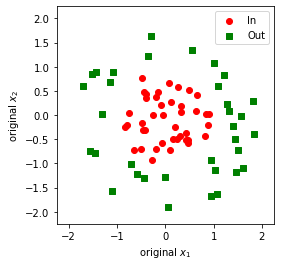

In [3]:
plt.scatter(X[:x1_in.shape[0], 0], X[:x1_in.shape[0], 1], color = "red", marker = "o", label = "In")
plt.scatter(X[x1_in.shape[0]:, 0], X[x1_in.shape[0]:, 1], color = "green", marker = "s", label = "Out")
plt.axis("scaled")
plt.xlim(-2.25, 2.25)
plt.ylim(-2.25, 2.25)
plt.xlabel("original $x_1$")
plt.ylabel("original $x_2$")
plt.legend(loc = 1)
plt.show()

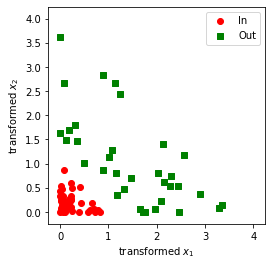

In [4]:
X_transformed = np.power(X, 2)

plt.scatter(X_transformed[:x1_in.shape[0], 0], X_transformed[:x1_in.shape[0], 1], color = "red", marker = "o", label = "In")
plt.scatter(X_transformed[x1_in.shape[0]:, 0], X_transformed[x1_in.shape[0]:, 1], color = "green", marker = "s", label = "Out")
plt.axis("scaled")
plt.xlim(-0.25, 4.25)
plt.ylim(-0.25, 4.25)
plt.xlabel("transformed $x_1$")
plt.ylabel("transformed $x_2$")
plt.legend(loc = 1)
plt.show()

In [5]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(X_transformed, y)

print("Intercept weight: {}.".format(perceptron.intercept_))
print("Weights vector: {}.".format(perceptron.coef_))

Intercept weight: [-2.].
Weights vector: [[2.36966542 1.48327095]].


In [6]:
# modified function to admit data transformation
def plot_decision_regions(X, y, classifier, feature_names, modified = False, transf1 = lambda x: x, transf2 = None, resolution = 0.01, axis_lim = 1):
    # general settings
    markers = ["o", "s", "*", "x", "v"]
    colors  = ("red", "green", "blue", "gray", "cyan")
    x1_min, x1_max = X[:, 0].min() - axis_lim, X[:, 0].max() + axis_lim
    x2_min, x2_max = X[:, 1].min() - axis_lim, X[:, 1].max() + axis_lim
    # define a grid
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    # tranform the point that will be predicted, but NOT the one which will be plotted
    if modified:
        if transf2 == None:
            transf2 = transf1
        xx1_mod = transf1(xx1)
        xx2_mod = transf2(xx2)
    else:
        xx1_mod = xx1
        xx2_mod = xx2      
    # classify each grid point
    result = classifier.predict(np.array([xx1_mod.ravel(), xx2_mod.ravel()]).T)
    result = result.reshape(xx1_mod.shape)
    # make a plot
    plt.contourf(xx1, xx2, result, colors = colors[0:len(np.unique(y))], alpha = 0.5)
    for index, value in enumerate(np.unique(y)): # plot each point & 'enumerate()' returns index and value of the given array
        plt.scatter(x = X[y == value, 0], y = X[y == value, 1], # select each X and y vectors by creating a mask
                    color = colors[index],
                    marker = markers[index],
                    label = feature_names[index],
                    edgecolor = 'black')

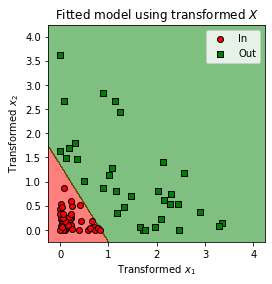

In [7]:
feature_names = ["In", "Out"]
plot_decision_regions(X_transformed, y, perceptron, feature_names)
plt.title("Fitted model using transformed $X$")
plt.xlabel("Transformed $x_1$")
plt.ylabel("Transformed $x_2$")
plt.axis("scaled")
plt.xlim(-0.25, 4.25)
plt.ylim(-0.25, 4.25)
plt.legend(loc = 1)
plt.show()

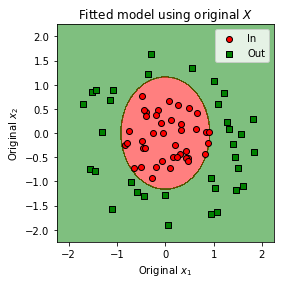

In [8]:
feature_names = ["In", "Out"]
plot_decision_regions(X, y, perceptron, feature_names, True, lambda x: np.power(x, 2))
plt.title("Fitted model using original $X$")
plt.xlabel("Original $x_1$")
plt.ylabel("Original $x_2$")
plt.axis("scaled")
plt.xlim(-2.25, 2.25)
plt.ylim(-2.25, 2.25)
plt.legend(loc = 1)
plt.show()

# Regression problem

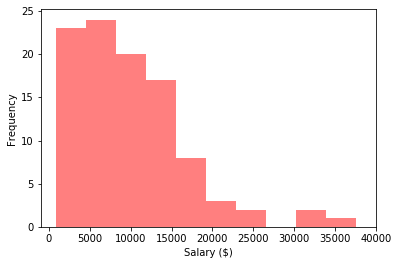

In [9]:
rn = np.random.RandomState(1)
X  = rn.gamma(2, 5000, 100)
X  = X.reshape(100, 1)
plt.hist(X, color = "red", alpha = 0.5, bins = 10)
plt.xlabel("Salary (\$)")
plt.ylabel("Frequency")
plt.xticks(np.arange(0, 45e3, 5e3))
plt.show()

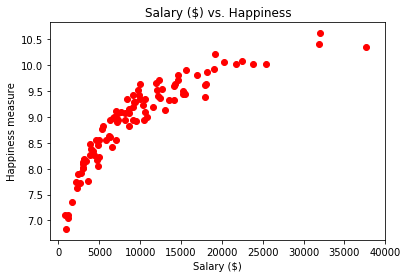

In [10]:
y = np.log(X) + rn.normal(0, 0.2, 100).reshape(100, 1)
plt.scatter(X, y, marker = "o", color = "red")
plt.title("Salary (\$) vs. Happiness")
plt.xlabel("Salary (\$)")
plt.ylabel("Happiness measure")
plt.xticks(np.arange(0, 45e3, 5e3))
plt.show()

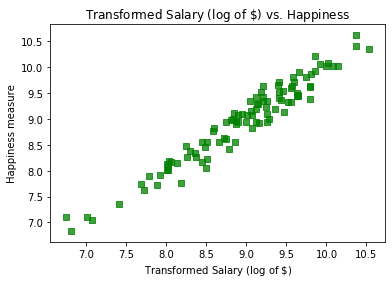

In [11]:
X_transformed = np.log(X)
plt.scatter(X_transformed, y, marker = "s", color = "green", alpha = 0.75)
plt.title("Transformed Salary ($\log$ of \$) vs. Happiness")
plt.xlabel("Transformed Salary ($\log$ of \$)")
plt.ylabel("Happiness measure")
plt.show()

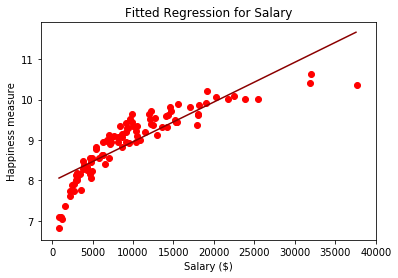

In [12]:
from sklearn.linear_model import LinearRegression

regression_original = LinearRegression()
regression_original.fit(X, y)

x_min = X[:, 0].min()
x_max = X[:, 0].max()
x_values = np.arange(x_min, x_max, 100)
y_values = regression_original.predict(np.asarray(x_values).reshape(len(x_values), 1))
plt.plot(x_values, y_values, color = "darkred")
plt.scatter(X, y, marker = "o", color = "red")
plt.title("Fitted Regression for Salary")
plt.xlabel("Salary (\$)")
plt.ylabel("Happiness measure")
plt.xticks(np.arange(0, 45e3, 5e3))
plt.show()

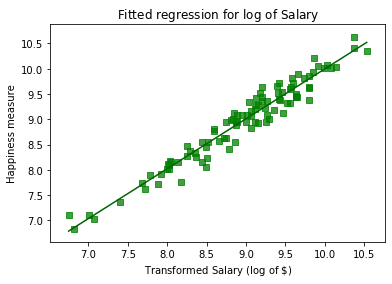

In [13]:
regression_transformed = LinearRegression()
regression_transformed.fit(X_transformed, y)

x_min = X_transformed[:, 0].min()
x_max = X_transformed[:, 0].max()
x_values = np.arange(x_min, x_max, 0.01)
y_values = regression_transformed.predict(np.asarray(x_values).reshape(len(x_values), 1))
plt.plot(x_values, y_values, color = "darkgreen")
plt.scatter(X_transformed, y, marker = "s", color = "green", alpha = 0.75)
plt.title("Fitted regression for $\log$ of Salary")
plt.xlabel("Transformed Salary ($\log$ of \$)")
plt.ylabel("Happiness measure")
plt.show()

In [14]:
r2_original = regression_original.score(X, y)
print("R-squared for the original model: {}.".format(r2_original))
print("Intercept: {} & Coefficients: {}.".format(regression_original.intercept_[0], regression_original.coef_[0, 0]))

R-squared for the original model: 0.7538771643539155.
Intercept: 7.975309624979791 & Coefficients: 9.828555226466561e-05.


In [15]:
r2_transformed = regression_transformed.score(X_transformed, y)
print("R-squared for the 'tranformed' model: {}.".format(r2_transformed))
print("Intercept: {} & Coefficients: {}.".format(regression_transformed.intercept_[0], regression_transformed.coef_[0, 0]))

R-squared for the 'tranformed' model: 0.9431020022916391.
Intercept: 0.12929691342341698 & Coefficients: 0.9867610189477893.
